In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv")

In [4]:
df.shape

(1000, 17)

In [5]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [7]:
df.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [11]:
df.describe(include="all")

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,6,NaN,5,5,NaN,NaN,NaN,3,3,NaN,4,NaN,2,2
top,unknown,NaN,good,furniture/appliances,NaN,< 100 DM,1 - 4 years,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no,no
freq,394,NaN,530,473,NaN,603,339,NaN,NaN,NaN,814,713,NaN,630,NaN,596,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [10]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [12]:
df = df.copy()

In [13]:
duplicate = df.duplicated()
print(duplicate.sum())

0


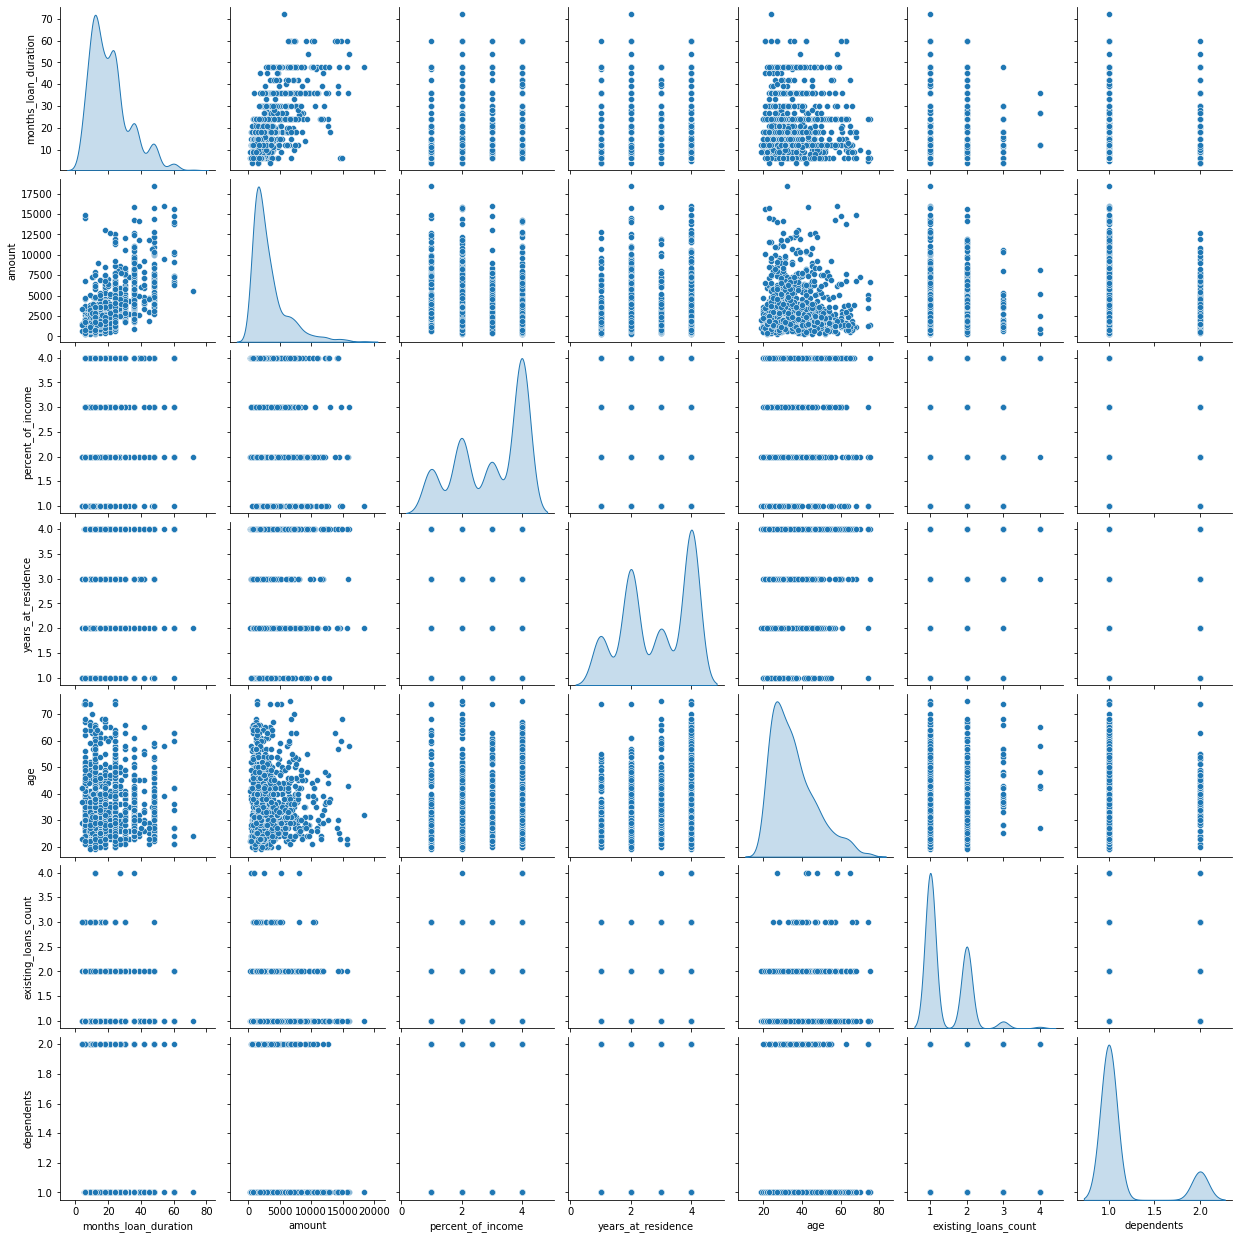

In [14]:
sns.pairplot(df,diag_kind="kde")

<AxesSubplot:>

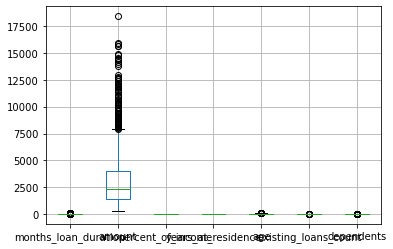

In [15]:
df.boxplot()

<function matplotlib.pyplot.show(close=None, block=None)>

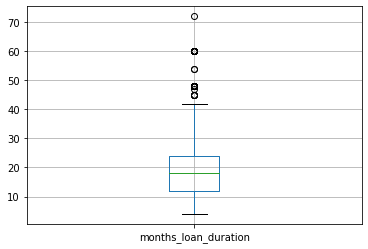

In [19]:
df.boxplot(column=['months_loan_duration'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

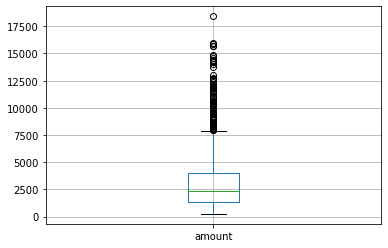

In [20]:
df.boxplot(column=['amount'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

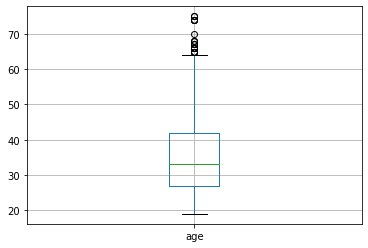

In [22]:
df.boxplot(column=['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

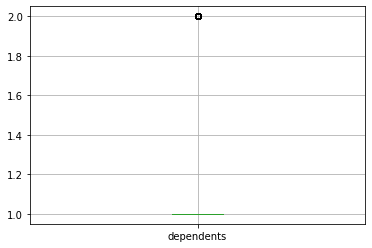

In [24]:
df.boxplot(column=['dependents'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

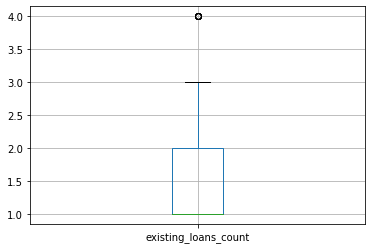

In [26]:
df.boxplot(column=['existing_loans_count'])
plt.show

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range,upper_range

In [33]:
low_mld,upp_mld=remove_outlier(df['months_loan_duration'])
df['months_loan_duration']=np.where(df["months_loan_duration"]>upp_mld,upp_mld,df['months_loan_duration'])
df['months_loan_duration']=np.where(df["months_loan_duration"]<low_mld,low_mld,df['months_loan_duration'])

low_amt,upp_amt=remove_outlier(df['amount'])
df['amount']=np.where(df["amount"]>upp_amt,upp_amt,df['amount'])
df['amount']=np.where(df["amount"]<low_amt,low_amt,df['amount'])


low_age,upp_age = remove_outlier(df['age'])
df['age']=np.where(df["age"]>upp_age,upp_age,df['age'])
df['age']=np.where(df["age"]<low_age,low_age,df['age'])

low_dpnds,upp_dpnds=remove_outlier(df['dependents'])
df['dependents']=np.where(df["dependents"]>upp_dpnds,upp_dpnds,df['dependents'])
df['dependents']=np.where(df["dependents"]<low_dpnds,low_dpnds,df['dependents'])

low_elc,upp_elc=remove_outlier(df['existing_loans_count'])
df['existing_loans_count']=np.where(df["existing_loans_count"]>upp_elc,upp_elc,df['existing_loans_count'])
df['existing_loans_count']=np.where(df["existing_loans_count"]<low_elc,low_elc,df['existing_loans_count'])

<AxesSubplot:ylabel='months_loan_duration'>

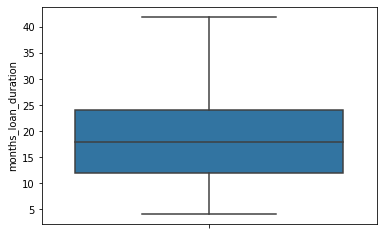

In [34]:
sns.boxplot(y="months_loan_duration",data=df)

<AxesSubplot:ylabel='amount'>

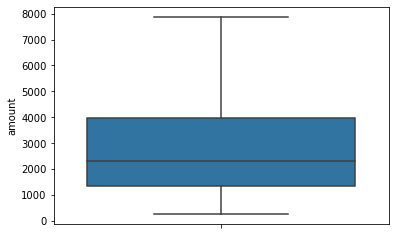

In [35]:
sns.boxplot(y="amount",data=df)

<AxesSubplot:ylabel='age'>

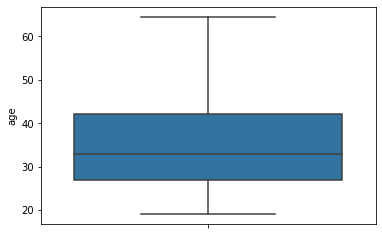

In [36]:
sns.boxplot(y="age",data=df)

<AxesSubplot:ylabel='dependents'>

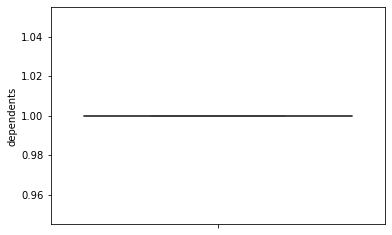

In [37]:
sns.boxplot(y="dependents",data=df)

<AxesSubplot:ylabel='existing_loans_count'>

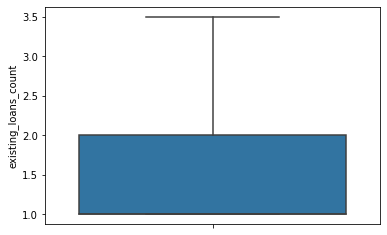

In [38]:
sns.boxplot(y="existing_loans_count",data=df)

In [59]:
corr = df.corr()
corr

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.641783,0.092999,0.033969,-0.039504,0.000996,NaN
amount,0.641783,1.000000,-0.291218,0.031144,0.025524,0.040045,NaN
percent_of_income,0.092999,-0.291218,1.000000,0.049302,0.064109,0.018847,NaN
years_at_residence,0.033969,0.031144,0.049302,1.000000,0.269418,0.086822,NaN
age,-0.039504,0.025524,0.064109,0.269418,1.000000,0.148192,NaN
existing_loans_count,0.000996,0.040045,0.018847,0.086822,0.148192,1.000000,NaN
dependents,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\aliak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months_loan_duration', ylabel='dependents'>

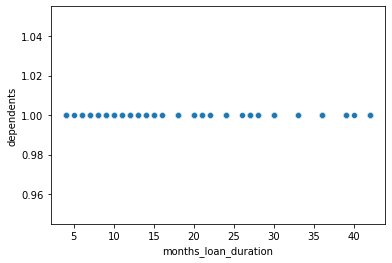

In [60]:
sns.scatterplot(df['months_loan_duration'],df['dependents'],data=df)

C:\Users\aliak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount', ylabel='dependents'>

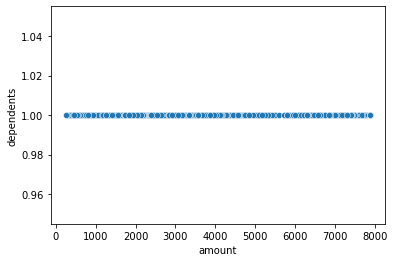

In [61]:
sns.scatterplot(df['amount'],df['dependents'],data=df)

C:\Users\aliak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='percent_of_income', ylabel='dependents'>

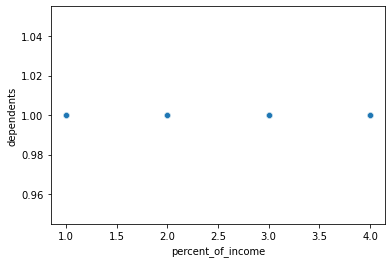

In [62]:
sns.scatterplot(df['percent_of_income'],df['dependents'],data=df)

C:\Users\aliak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='years_at_residence', ylabel='dependents'>

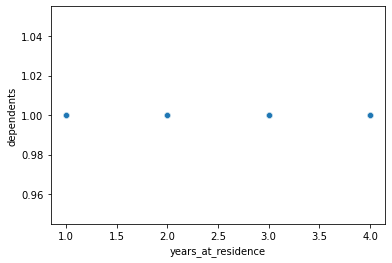

In [63]:
sns.scatterplot(df['years_at_residence'],df['dependents'],data=df)

C:\Users\aliak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='dependents'>

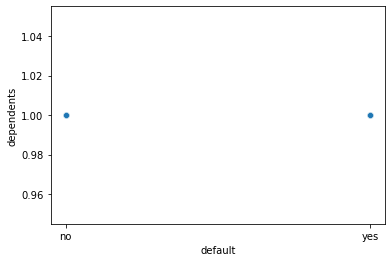

In [65]:
sns.scatterplot(df['existing_loans_count'],df['dependents'],data=df)

<AxesSubplot:>

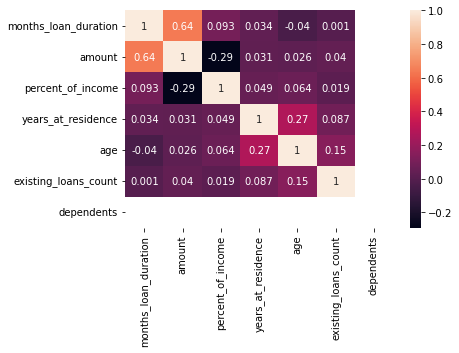

In [66]:
sns.heatmap(corr,annot=True)